In [1]:
import pandas as pd
from os import chdir
chdir("C:/Users/manda/Documents/Notes/Datasets/")
from warnings import filterwarnings
filterwarnings("ignore")

## Problem Statement 1 - Loan_Status

In [2]:
A = pd.read_csv("loan_training_set.csv")

## Dataset Profile

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
A['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

## Dropping Discrete Features

In [7]:
A = A.drop(labels="Loan_ID", axis=1)

In [8]:
# seperating categorical and continous features list
cat = []
con = []

for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
print(cat)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [10]:
print(con)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Missing Data Treatment

In [11]:
for i in A.columns:
    if(A[i].dtypes == "object"):
        temp = A[i].mode()[0]
        A[i] = A[i].fillna(temp)
    else:
        temp = round(A[i].mean(), 3)
        A[i] = A[i].fillna(temp)

In [12]:
A['Gender'].mode()[0]

'Male'

In [13]:
round(A['LoanAmount'].mean(), 3)

146.412

In [14]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outliers

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q = pd.DataFrame(ss.fit_transform(A[con]), columns=con)

In [16]:
Q.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,7.265121e-02,-0.554368,-0.000002,0.279851,0.451687
1,2.454758e-08,-0.038610,-0.219273,0.279851,0.451687
2,-3.940959e-01,-0.554368,-0.957641,0.279851,0.451687
3,-4.624124e-01,0.252103,-0.314546,0.279851,0.451687
4,9.738930e-02,-0.554368,-0.064454,0.279851,0.451687


In [17]:
out = []
for i in con:
    out.extend(Q[(Q[i]>3) | (Q[i]<-3)].index)

In [18]:
print(out)

[126, 155, 171, 183, 185, 333, 409, 443, 9, 177, 402, 417, 581, 600, 130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525, 561, 604, 14, 68, 94, 133, 242, 262, 313, 495, 497, 546, 575, 585]


In [19]:
import numpy as np
outliers = np.unique(out)

In [20]:
outliers

array([  9,  14,  68,  94, 126, 130, 133, 155, 171, 177, 183, 185, 242,
       262, 278, 308, 313, 333, 369, 402, 409, 417, 432, 443, 487, 495,
       497, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604])

In [21]:
A = A.drop(index=outliers, axis=0)

In [22]:
A.shape

(577, 12)

In [23]:
A.index = range(0,577)

## Exploratory Data Analysis

### Continous features analysis - ANOVA Test of Independence

In [24]:
#ANOVA function
def ANOVA(dataframe, continous, categorical):
    from statsmodels.formula.api import ols
    eqn = str(continous) + "~" + str(categorical)
    model = ols(eqn, dataframe).fit()
    from statsmodels.stats.anova import anova_lm
    rs = anova_lm(model)
    return rs.iloc[0:1,4].values[0]

In [25]:
anova_pvals = {} #creating a dictionary for pvalues from ANOVA
for i in con:
    pval = ANOVA(A, i, "Loan_Status")
    anova_pvals[i] = pval

In [26]:
anova_pvals #p-values for all continous features

{'ApplicantIncome': 0.8943444103680676,
 'CoapplicantIncome': 0.2820625898787197,
 'LoanAmount': 0.3975038561633506,
 'Loan_Amount_Term': 0.6636212713375147,
 'Credit_History': 2.5581568040267957e-49}

In [27]:
#filtering good continous features (having pval less than 0.4)
for key, value in anova_pvals.items():
    if(value < 0.4):
        print(key, ":", value)

CoapplicantIncome : 0.2820625898787197
LoanAmount : 0.3975038561633506
Credit_History : 2.5581568040267957e-49


From ANOVA we can conclude that 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History' are good continous predictors for 'Loan_Status'.

### Categorical features analysis - Chi-Square Test

In [28]:
# Chi-Square Test function
def ChiSq(dataframe, categorical1, categorical2):
    from scipy.stats import chi2_contingency
    rs = chi2_contingency(pd.crosstab(dataframe[categorical1], dataframe[categorical2]))
    return rs[1]

In [29]:
chisq_pvals = {} # creating a dictionary for pvalues from Chi-Square test
for i in cat:
    pval = ChiSq(A, i, "Loan_Status")
    chisq_pvals[i] = pval

In [30]:
chisq_pvals #p-values for all categorical features

{'Gender': 0.7623575001800956,
 'Married': 0.04093872592584048,
 'Dependents': 0.5826451238806551,
 'Education': 0.03414825953694172,
 'Self_Employed': 0.6158136683554957,
 'Property_Area': 0.0023192782270974365,
 'Loan_Status': 1.7422936841219314e-126}

In [31]:
#filtering good categorical features (having pval less than 0.05)
for key, value in chisq_pvals.items():
    if(value < 0.2):
        print(key, ":", value)

Married : 0.04093872592584048
Education : 0.03414825953694172
Property_Area : 0.0023192782270974365
Loan_Status : 1.7422936841219314e-126


From Chi-Square Test we can conclude that 'Married', 'Education', 'Property_Area' are good categorical predictors for 'Loan_Status'

## Define X and Y

In [32]:
Y = A[["Loan_Status"]]
X = A[
    [
        "CoapplicantIncome",
        "ApplicantIncome",
        "LoanAmount",
        "Credit_History",
        "Married",
        "Education",
        "Property_Area"
    ]
]

In [33]:
X.head()

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Married,Education,Property_Area
0,0.0,5849.000,146.412,1.0,No,Graduate,Urban
1,1508.0,5405.541,128.000,1.0,Yes,Graduate,Rural
2,0.0,3000.000,66.000,1.0,Yes,Graduate,Urban
3,2358.0,2583.000,120.000,1.0,Yes,Not Graduate,Urban
4,0.0,6000.000,141.000,1.0,No,Graduate,Urban


In [34]:
Y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [35]:
# updating cat[] and con[]
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [36]:
print(cat)

['Married', 'Education', 'Property_Area']


In [37]:
print(con)

['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Credit_History']


## Preprocessing

### Standardizing continous features

In [38]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]), columns=con)

In [39]:
X1.head()

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History
0,0.000000,0.277770,0.370383,1.0
1,0.167929,0.256155,0.320755,1.0
2,0.000000,0.138909,0.153639,1.0
3,0.262584,0.118585,0.299191,1.0
4,0.000000,0.285129,0.355795,1.0


### Encoding categorical features

In [40]:
X2 = pd.get_dummies(X[cat])

In [41]:
X2.head()

,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,0
2,0,1,1,0,0,0,1
3,0,1,0,1,0,0,1
4,1,0,1,0,0,0,1


In [42]:
Xnew = X1.join(X2)

In [43]:
Xnew.head()

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.277770,0.370383,1.0,1,0,1,0,0,0,1
1,0.167929,0.256155,0.320755,1.0,0,1,1,0,1,0,0
2,0.000000,0.138909,0.153639,1.0,0,1,1,0,0,0,1
3,0.262584,0.118585,0.299191,1.0,0,1,0,1,0,0,1
4,0.000000,0.285129,0.355795,1.0,1,0,1,0,0,0,1


## Splitting the data

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=21)

## Model - Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

print(tr_acc, ts_acc)

0.8112798264642083 0.8448275862068966


In [46]:
logistric_regression_accuracy = [tr_acc, ts_acc]

In [47]:
logistric_regression_accuracy #training and testing accuracy

[0.8112798264642083, 0.8448275862068966]

## Model - KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier(n_neighbors=5)
model = knr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)


tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

print(tr_acc, ts_acc)

0.841648590021692 0.7672413793103449


In [49]:
#tuning the hyperparamter 'n_neighbors'

tuning_grid = {"n_neighbors":range(2, 15, 1)}
knr = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr, tuning_grid, scoring = "accuracy", cv=8)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_neighbors': 10}

In [50]:
knr = KNeighborsClassifier(n_neighbors=10)
model = knr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)


tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

print(tr_acc, ts_acc)

0.806941431670282 0.7758620689655172


In [51]:
knn_accuracy = [tr_acc, ts_acc]

In [52]:
knn_accuracy #training and testing accuracy

[0.806941431670282, 0.7758620689655172]

## Model - Decision Tree

For Decision Tree it is fine if the data is not standardized.

In [53]:
# Define X and Y again

Y = A[["Loan_Status"]]
X = A[
    [
        "CoapplicantIncome",
        "ApplicantIncome",
        "LoanAmount",
        "Credit_History",
        "Married",
        "Education",
        "Property_Area",
    ]
]

In [54]:
# Encoding categorical features
X1 = X[con]
X2 = pd.get_dummies(X[cat])

In [55]:
Xnew = X1.join(X2)

In [56]:
Xnew.head()

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849.000,146.412,1.0,1,0,1,0,0,0,1
1,1508.0,5405.541,128.000,1.0,0,1,1,0,1,0,0
2,0.0,3000.000,66.000,1.0,0,1,1,0,0,0,1
3,2358.0,2583.000,120.000,1.0,0,1,0,1,0,0,1
4,0.0,6000.000,141.000,1.0,1,0,1,0,0,0,1


In [57]:
# Splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=21)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=21)
model = dtc.fit(xtrain, ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [59]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

In [60]:
print(tr_acc, ts_acc)

1.0 0.7241379310344828


### Post-Pruning

In [61]:
# tuning 'min_samples_split'

tuning_grid = {"min_samples_split":range(2, 50, 1)}
dtr = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr, tuning_grid, scoring = "accuracy", cv=8)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 48}

In [62]:
# tuning 'min_samples_split'

tuning_grid = {"min_samples_leaf":range(2, 40, 1)}
dtr = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr, tuning_grid, scoring = "accuracy", cv=8)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 28}

In [63]:
tuning_grid = {"max_depth":range(2, 10, 1)}
dtr = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr, tuning_grid, scoring = "accuracy", cv=8)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 2}

### Decision Tree model after post-pruning

In [64]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=42, random_state=21)
model = dtc.fit(xtrain, ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

print(tr_acc, ts_acc)

0.8546637744034707 0.7931034482758621


In [65]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=33, random_state=21)
model = dtc.fit(xtrain, ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

print(tr_acc, ts_acc)

0.8112798264642083 0.8448275862068966


In [66]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=21)
model = dtc.fit(xtrain, ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain, tr_pred)
ts_acc = accuracy_score(ytest, ts_pred)

print(tr_acc, ts_acc)

0.8134490238611713 0.8362068965517241


The DT model with the hyperparameter 'min_samples_leaf' equal to 44 performs the best.

In [67]:
tree_accuracy = [tr_acc, ts_acc] 

In [68]:
tree_accuracy #training and testing accuracy

[0.8134490238611713, 0.8362068965517241]

## Model - Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=500, random_state=21)
model = rfr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)

print(tr_acc, ts_acc)

1.0 0.7931034482758621


Overfitting observed in model. Using Post-Pruning techniques to reduce generalization error.

In [70]:
# GridSearch CV for hyperparameter tuning
tg = {"max_depth":range(2,10,1),"n_estimators":range(2,100,10)}
rfc = RandomForestClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring = "accuracy",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 5, 'n_estimators': 82}

In [71]:
rfr = RandomForestClassifier(n_estimators=12, max_depth=3, random_state=21)
model = rfr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)

print(tr_acc, ts_acc)

0.8134490238611713 0.8448275862068966


In [72]:
random_forest_accuracy = [tr_acc, ts_acc]

In [73]:
random_forest_accuracy #training and testing accuracy

[0.8134490238611713, 0.8448275862068966]

## Model - AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier(random_state=21, max_depth=2)
abc = AdaBoostClassifier(dtc, n_estimators=100)
model = abc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)

print(tr_acc,ts_acc)

1.0 0.7068965517241379


Overfitting observed. Using GridSearch CV to find best hyperparameters.

In [75]:
tg = {"n_estimators":range(2,200,10)}

dtc = DecisionTreeClassifier(random_state=21, max_depth=2)
abc = AdaBoostClassifier(dtc)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abc,tg,scoring = "accuracy",cv=8)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 2}

In [76]:
#AdaBoost model with tuned hypeparameters

dtc = DecisionTreeClassifier(random_state=21, max_depth=2)
abc = AdaBoostClassifier(dtc,n_estimators=2)
model = abc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc  = accuracy_score(ytest,ts_pred)

print(tr_acc,ts_acc)

0.8177874186550976 0.8275862068965517


In [77]:
tr_acc

0.8177874186550976

In [78]:
adaboost_accuracy = [tr_acc, ts_acc] 

In [79]:
adaboost_accuracy #training and testing

[0.8177874186550976, 0.8275862068965517]

## Model Evaluations

In [80]:
print("Logistic Regression", logistric_regression_accuracy)
print("KNN", knn_accuracy)
print("Decision Tree", tree_accuracy)
print("Random Forest", random_forest_accuracy)
print("AdaBoost:", adaboost_accuracy)

Logistic Regression [0.8112798264642083, 0.8448275862068966]
KNN [0.806941431670282, 0.7758620689655172]
Decision Tree [0.8134490238611713, 0.8362068965517241]
Random Forest [0.8134490238611713, 0.8448275862068966]
AdaBoost: [0.8177874186550976, 0.8275862068965517]


From above observations we can conclude that Decsion Tree, Random Forest, AdaBoost and Logistic Regression are performing more or less similar to each other. Therefore it won't make much of differnce if you pick any of the mentioned model.

## Final Model - AdaBoost for 'Loan_Status'

In [81]:
dtc = DecisionTreeClassifier(random_state=21, max_depth=2)
abc = AdaBoostClassifier(dtc,n_estimators=2)
loanStatus_model = abc.fit(Xnew, Y)

In [82]:
import pickle as pkl
pkl.dump(loanStatus_model, open("loanStatus_model.pkl","wb"))

## Problem Statement 2 - LoanAmount

In [83]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.000,0.0,146.412,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.541,1508.0,128.000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.000,0.0,66.000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.000,2358.0,120.000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.000,0.0,141.000,360.0,1.0,Urban,Y


## Exploratory Data Analysis

### Continous features analysis - Correlation

In [84]:
P = A.corr()['LoanAmount'].sort_values()
P = P[P!=1]
P = P[(P>0.3) | (P<-0.3)]

In [85]:
P

CoapplicantIncome    0.309603
ApplicantIncome      0.442229
Name: LoanAmount, dtype: float64

From Correlation we can conclude 'CoapplicantIncome', 'ApplicantIncome' are good continous predictors for 'LoanAmount'.

### Categorical features analysis - ANOVA

In [86]:
#updating cat[], con[] list
cat = []
con = []

for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [87]:
print(cat)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [88]:
print(con)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [89]:
anova_pvals = {} #creating a dictionary for p-values from ANOVA
for i in cat:
    pval = ANOVA(A, "LoanAmount", i)
    anova_pvals[i] = pval

In [90]:
anova_pvals

{'Gender': 0.00011393091025986167,
 'Married': 6.726604265542053e-05,
 'Dependents': 0.008630321795081315,
 'Education': 0.0004110644401791326,
 'Self_Employed': 0.0033620949207321463,
 'Property_Area': 0.19100079376121265,
 'Loan_Status': 0.3975038561633506}

In [91]:
#filtering good continous features (having pval less than 0.05)
for key, value in anova_pvals.items():
    if(value < 0.05):
        print(key, ":", value)

Gender : 0.00011393091025986167
Married : 6.726604265542053e-05
Dependents : 0.008630321795081315
Education : 0.0004110644401791326
Self_Employed : 0.0033620949207321463


From ANOVA we can conclude that 'Married', 'Education', 'Gender', 'Dependents', 'Self_Employed' are good categorical predictors for 'LoanAmount'.

## Define X and Y

In [92]:
X = A[
    [
        "CoapplicantIncome",
        "ApplicantIncome",
        "Married",
        "Education",
        "Gender",
        "Dependents",
        "Self_Employed"
    ]
]
Y = A[["LoanAmount"]]

In [93]:
X.head()

,CoapplicantIncome,ApplicantIncome,Married,Education,Gender,Dependents,Self_Employed
0,0.0,5849.000,No,Graduate,Male,0,No
1,1508.0,5405.541,Yes,Graduate,Male,1,No
2,0.0,3000.000,Yes,Graduate,Male,0,Yes
3,2358.0,2583.000,Yes,Not Graduate,Male,0,No
4,0.0,6000.000,No,Graduate,Male,0,No


In [94]:
Y.head()

,LoanAmount
0,146.412
1,128.000
2,66.000
3,120.000
4,141.000


## Preprocessing

### Standardizing continous features

In [95]:
#updating cat[], con[] list
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [96]:
print(cat)

['Married', 'Education', 'Gender', 'Dependents', 'Self_Employed']


In [97]:
print(con)

['CoapplicantIncome', 'ApplicantIncome']


In [98]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]), columns=con)

In [99]:
X1.head()

,CoapplicantIncome,ApplicantIncome
0,0.000000,0.277770
1,0.167929,0.256155
2,0.000000,0.138909
3,0.262584,0.118585
4,0.000000,0.285129


### Encoding categorical features

In [100]:
X2 = pd.get_dummies(X[cat])

In [101]:
Xnew = X1.join(X2)

In [102]:
Xnew.head()

,CoapplicantIncome,ApplicantIncome,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,0.000000,0.277770,1,0,1,0,0,1,1,0,0,0,1,0
1,0.167929,0.256155,0,1,1,0,0,1,0,1,0,0,1,0
2,0.000000,0.138909,0,1,1,0,0,1,1,0,0,0,0,1
3,0.262584,0.118585,0,1,0,1,0,1,1,0,0,0,1,0
4,0.000000,0.285129,1,0,1,0,0,1,1,0,0,0,1,0


## Splitting the data

In [103]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=21)

## Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=31)

lm = LinearRegression()
model = lm.fit(xtrain, ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain, tr_pred)
ts_err = mean_absolute_error(ytest, ts_pred)

tr_err, ts_err

(32.0252489154013, 28.362706896551725)

In [105]:
x = 0.01
alphas = []
for i in range(0,1050,1):
    alphas.append(x)
    x = round(x + 0.01,2)

In [106]:
from sklearn.linear_model import Lasso
tuning_grid = {"alpha":alphas}
ls = Lasso(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(ls, tuning_grid, scoring = "neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 0.01}

In [107]:
ls = Lasso(alpha=0.08)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, ts_err - tr_err)

32.06295683772626 28.454319631663992 -3.6086372060622693


## Ridge Regression

In [108]:
from sklearn.linear_model import Ridge
tuning_grid = {"alpha":alphas}
rr = Ridge()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr, tuning_grid, scoring = "neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 0.01}

In [109]:
rr = Ridge(alpha=0.01)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, ts_err-tr_err)

32.02953594262204 28.370355942136307 -3.6591800004857333


## AdaBoost

In [110]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2))
model = abr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, tr_err-ts_err)

32.877643907592066 32.6617235322842 0.21592037530786712


In [111]:
#GridSearch CV for hyperparameter tuning
tg = {"n_estimators":range(2,30,10)}

dtc = DecisionTreeRegressor(random_state=21, max_depth=2)
abc = AdaBoostRegressor(dtc)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abc, tg, scoring = "neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(Xnew, Y)
cvmodel.best_params_

{'n_estimators': 12}

In [112]:
abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21, max_depth=2), n_estimators=22)
model = abr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, tr_err-ts_err)

32.87964669364445 31.737174316929817 1.142472376714636


From above observations we can conclude that 'Linear Regression', 'Lasso Regression', 'Ridge Regression' and 'AdaBoostRegressor' are performing similar to each other. But for making predictions on final test dataset we will be chosing 'Ridge Regression'.

## Final Model - Ridge Regression for 'LoanAmount'

In [113]:
Xnew.head()

,CoapplicantIncome,ApplicantIncome,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,0.000000,0.277770,1,0,1,0,0,1,1,0,0,0,1,0
1,0.167929,0.256155,0,1,1,0,0,1,0,1,0,0,1,0
2,0.000000,0.138909,0,1,1,0,0,1,1,0,0,0,0,1
3,0.262584,0.118585,0,1,0,1,0,1,1,0,0,0,1,0
4,0.000000,0.285129,1,0,1,0,0,1,1,0,0,0,1,0


In [114]:
rr = Ridge(alpha=0.01)
loanAmount_model = rr.fit(Xnew, Y)

In [115]:
import pickle as pkl
pkl.dump(loanAmount_model, open("loanAmount_model.pkl", "wb"))

## Problem Statement 3 - LoanAmount_Term

In [116]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.000,0.0,146.412,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.541,1508.0,128.000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.000,0.0,66.000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.000,2358.0,120.000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.000,0.0,141.000,360.0,1.0,Urban,Y


## Exploratory Data Analysis

### Continous features analysis - Correlation

In [117]:
P = A.corr()['Loan_Amount_Term'].sort_values()
P = P[P!=1]

In [118]:
P

CoapplicantIncome   -0.060402
ApplicantIncome     -0.050422
Credit_History       0.030425
LoanAmount           0.040302
Name: Loan_Amount_Term, dtype: float64

Considering correlation all are bad continous predictors for 'Loan_Amount_Term'.

### Categorical features analysis - ANOVA

In [119]:
#updating cat[], con[] list
cat = []
con = []

for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [120]:
print(cat)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [121]:
print(con)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [122]:
anova_pvals = {} #creating a dictionary for p-values from ANOVA
for i in cat:
    pval = ANOVA(A, "LoanAmount", i)
    anova_pvals[i] = pval

In [123]:
anova_pvals

{'Gender': 0.00011393091025986167,
 'Married': 6.726604265542053e-05,
 'Dependents': 0.008630321795081315,
 'Education': 0.0004110644401791326,
 'Self_Employed': 0.0033620949207321463,
 'Property_Area': 0.19100079376121265,
 'Loan_Status': 0.3975038561633506}

In [124]:
#filtering good continous features (having pval less than 0.05)
for key, value in anova_pvals.items():
    if(value < 0.05):
        print(key, ":", value)

Gender : 0.00011393091025986167
Married : 6.726604265542053e-05
Dependents : 0.008630321795081315
Education : 0.0004110644401791326
Self_Employed : 0.0033620949207321463


Considering ANOVA 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed' are good categorical predictors for 'Loan_Amount_Term'.

In [125]:
X = A[["Gender", "Married", "Dependents", "Education", "Self_Employed", "CoapplicantIncome", "ApplicantIncome"]]
Y = A[["Loan_Amount_Term"]]

In [126]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,ApplicantIncome
0,Male,No,0,Graduate,No,0.0,5849.000
1,Male,Yes,1,Graduate,No,1508.0,5405.541
2,Male,Yes,0,Graduate,Yes,0.0,3000.000
3,Male,Yes,0,Not Graduate,No,2358.0,2583.000
4,Male,No,0,Graduate,No,0.0,6000.000


In [127]:
Y.head()

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0


## Preprocessing

### Encoding categorical features

In [128]:
#updating cat[], con[] list
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [129]:
#standardizing continous features
X1 = pd.DataFrame(mm.fit_transform(X[con]), columns=con)

In [130]:
X2 = pd.get_dummies(X[cat])

In [131]:
Xnew = X1.join(X2)

In [132]:
Xnew.head()

,CoapplicantIncome,ApplicantIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.000000,0.277770,0,1,1,0,1,0,0,0,1,0,1,0
1,0.167929,0.256155,0,1,0,1,0,1,0,0,1,0,1,0
2,0.000000,0.138909,0,1,0,1,1,0,0,0,1,0,0,1
3,0.262584,0.118585,0,1,0,1,1,0,0,0,0,1,1,0
4,0.000000,0.285129,0,1,1,0,1,0,0,0,1,0,1,0


## Splitting the data

In [133]:
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=21)

In [134]:
xtrain.head()

,CoapplicantIncome,ApplicantIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
209,0.191203,0.188088,0,1,0,1,0,0,1,0,1,0,1,0
82,0.281849,0.108008,0,1,1,0,1,0,0,0,1,0,1,0
88,0.629621,0.297314,0,1,0,1,0,0,1,0,1,0,1,0
171,0.563808,0.086075,0,1,1,0,1,0,0,0,1,0,1,0
533,0.000000,0.210411,0,1,0,1,1,0,0,0,0,1,1,0


In [135]:
xtest.head()

,CoapplicantIncome,ApplicantIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
492,0.193987,0.099527,0,1,0,1,0,0,1,0,0,1,1,0
109,0.000000,0.355851,1,0,1,0,0,1,0,0,1,0,0,1
4,0.000000,0.285129,0,1,1,0,1,0,0,0,1,0,1,0
204,0.200445,0.000000,0,1,0,1,1,0,0,0,1,0,1,0
421,0.134744,0.161622,0,1,0,1,0,1,0,0,1,0,0,1


In [136]:
ytrain.head()

,Loan_Amount_Term
209,360.0
82,360.0
88,180.0
171,360.0
533,360.0


In [137]:
ytest.head()

,Loan_Amount_Term
492,360.0
109,360.0
4,360.0
204,360.0
421,360.0


## Linear Regression

In [138]:
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=31)

lm = LinearRegression()
model = lm.fit(xtrain, ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain, tr_pred)
ts_err = mean_absolute_error(ytest, ts_pred)

tr_err, ts_err

(28.704813819525302, 27.70018152391102)

## Lasso Regression

In [139]:
x = 0.01
alphas = []
for i in range(0,1050,1):
    alphas.append(x)
    x = round(x + 0.01,2)

In [140]:
tuning_grid = {"alpha":alphas}
ls = Lasso(random_state=21)

cv = GridSearchCV(ls, tuning_grid, scoring = "neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1.15}

In [141]:
ls = Lasso(alpha=0.29)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, ts_err - tr_err)

28.410966416572002 27.334370361282275 -1.076596055289727


## Ridge Regression

In [142]:
tuning_grid = {"alpha":alphas}
rr = Ridge(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr, tuning_grid, scoring = "neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 10.5}

In [143]:
rr = Ridge(alpha=10.5)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, ts_err-tr_err)

28.57441313362339 27.52292626829553 -1.0514868653278597


## AdaBoost

In [144]:
abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2))
model = abr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, tr_err-ts_err)


42.10033082552392 43.619266692985406 -1.5189358674614866


In [145]:
#GridSearch CV for hyperparameter tuning
tg = {"n_estimators":range(2,30,10)}

dtc = DecisionTreeRegressor(random_state=21, max_depth=2)
abc = AdaBoostRegressor(dtc)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abc, tg, scoring = "neg_mean_absolute_error", cv=4)
cvmodel = cv.fit(Xnew, Y)
cvmodel.best_params_

{'n_estimators': 2}

In [146]:
abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21, max_depth=2), n_estimators=22)
model = abr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

print(tr_err, ts_err, tr_err-ts_err)

37.31014153927295 37.58949498183719 -0.27935344256424344


## Final Model - Ridge Regression for 'Loan_Amount_Term'

In [147]:
rr = Ridge(alpha=0.01)
loanTerm_model = rr.fit(Xnew, Y)

In [148]:
pkl.dump(loanTerm_model, open("loanTerm_model.pkl", "wb"))

## Clustering

In [149]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.000,0.0,146.412,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.541,1508.0,128.000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.000,0.0,66.000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.000,2358.0,120.000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.000,0.0,141.000,360.0,1.0,Urban,Y


In [150]:
C = A[["ApplicantIncome", "LoanAmount"]]

In [151]:
C.head()

,ApplicantIncome,LoanAmount
0,5849.000,146.412
1,5405.541,128.000
2,3000.000,66.000
3,2583.000,120.000
4,6000.000,141.000


In [152]:
# updating cat[] and con[]
cat = []
con = []

for i in C.columns:
    if(C[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [153]:
mm = MinMaxScaler()
Q = pd.DataFrame(mm.fit_transform(A[con]), columns=con)

In [154]:
A.shape

(577, 12)

In [155]:
from sklearn.preprocessing import MinMaxScaler
Cnew = pd.DataFrame(mm.transform(C[C.columns]), columns=C.columns)

In [156]:
Cnew.head()

,ApplicantIncome,LoanAmount
0,0.277770,0.370383
1,0.256155,0.320755
2,0.138909,0.153639
3,0.118585,0.299191
4,0.285129,0.355795


## Elbow curve graph for determing optimum no. of clusters

In [157]:
import matplotlib.pyplot as plt

K= range(2,20,1)
WCSS = []

for i in K:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)
    clustering_model = km.fit(Cnew)
    WCSS.append(clustering_model.inertia_)

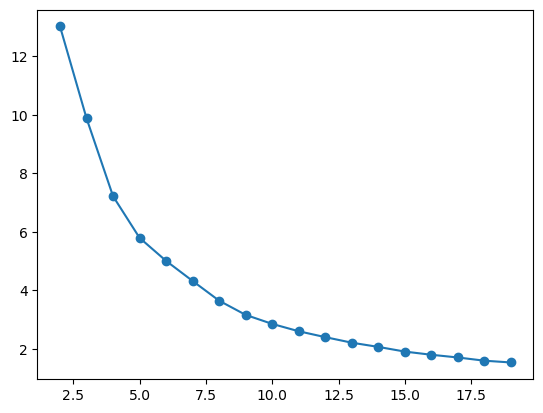

In [158]:
plt.plot(K,WCSS)
plt.scatter(K,WCSS)

From the above graph we can say 10 is no. of clusters that should be formed.

## Cluster Model

In [159]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)

In [160]:
clustering_model = km.fit(Cnew)

In [161]:
clustering_model.labels_

array([3, 3, 2, 7, 3, 6, 7, 0, 0, 2, 7, 0, 7, 3, 9, 2, 9, 7, 3, 6, 7, 9,
       0, 1, 7, 9, 2, 9, 4, 2, 9, 9, 5, 0, 7, 0, 4, 9, 2, 2, 2, 9, 9, 7,
       2, 3, 7, 0, 7, 7, 9, 9, 5, 7, 7, 0, 1, 0, 7, 7, 0, 3, 9, 6, 9, 6,
       9, 0, 7, 2, 9, 4, 9, 0, 7, 0, 9, 9, 0, 0, 6, 2, 0, 7, 7, 1, 4, 0,
       4, 2, 9, 3, 0, 2, 9, 7, 9, 0, 8, 0, 0, 7, 1, 3, 4, 7, 3, 0, 0, 3,
       9, 5, 0, 7, 4, 6, 4, 2, 0, 2, 4, 9, 0, 1, 4, 2, 2, 9, 6, 9, 7, 5,
       9, 4, 4, 4, 7, 1, 7, 8, 2, 1, 9, 3, 0, 6, 7, 2, 3, 1, 7, 6, 7, 6,
       7, 0, 3, 0, 9, 7, 2, 1, 7, 2, 4, 9, 9, 7, 9, 7, 4, 2, 2, 9, 2, 2,
       0, 1, 2, 1, 3, 2, 9, 0, 1, 7, 9, 8, 7, 4, 0, 0, 9, 9, 2, 2, 2, 9,
       1, 9, 6, 3, 0, 9, 7, 9, 2, 9, 2, 9, 0, 1, 3, 0, 9, 4, 0, 4, 7, 2,
       9, 6, 0, 4, 6, 9, 9, 7, 3, 0, 3, 9, 3, 3, 3, 7, 7, 0, 0, 7, 6, 5,
       4, 3, 9, 5, 9, 6, 7, 3, 9, 0, 0, 0, 0, 7, 2, 1, 7, 0, 9, 7, 4, 2,
       9, 0, 9, 2, 2, 8, 7, 7, 9, 9, 1, 0, 9, 0, 3, 0, 9, 4, 9, 3, 7, 7,
       7, 9, 7, 0, 0, 9, 7, 1, 2, 7, 2, 0, 9, 9, 7,

In [162]:
clustering_model.cluster_centers_

array([[0.14709659, 0.39479494],
       [0.45549639, 0.4745163 ],
       [0.14173112, 0.14403207],
       [0.30580579, 0.33206807],
       [0.26199588, 0.4940232 ],
       [0.72166496, 0.67358491],
       [0.34862259, 0.7390092 ],
       [0.11231534, 0.26493186],
       [0.75539575, 0.2472002 ],
       [0.19355701, 0.28814016]])

In [163]:
CC = pd.DataFrame(mm.inverse_transform(clustering_model.cluster_centers_), columns=["X", "Y"])

In [164]:
CC # Cluster centers

,X,Y
0,3167.980769,155.468923
1,9495.419355,185.045548
2,3057.897436,62.435897
3,6424.217294,132.197255
4,5525.369565,192.282609
5,14956.400000,258.900000
6,7302.689655,283.172414
7,2454.373832,107.289720
8,15648.454545,100.711273
9,4121.209091,115.900000


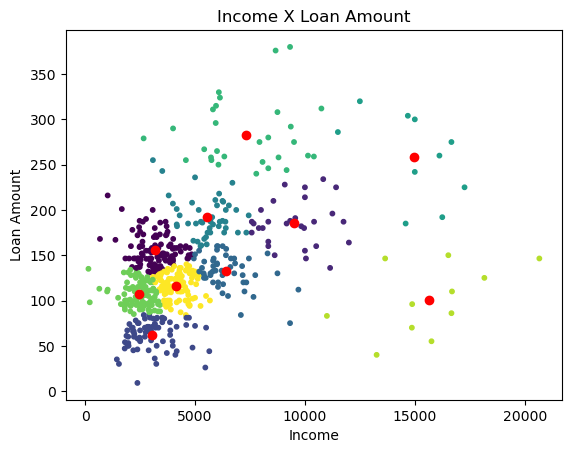

In [165]:
import matplotlib.pyplot as plt
plt.scatter(C['ApplicantIncome'], C['LoanAmount'], s=10, c=clustering_model.labels_)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income X Loan Amount")

plt.scatter(CC.X, CC.Y, c='r')

## Model for clustering

In [166]:
km = KMeans(n_clusters=10)
clustering_model = km.fit(Cnew)

In [167]:
pkl.dump(clustering_model, open("clustering_model.pkl", "wb"))